In [7]:
# 나눔 폰트 설치
!apt-get update -qq
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped dire

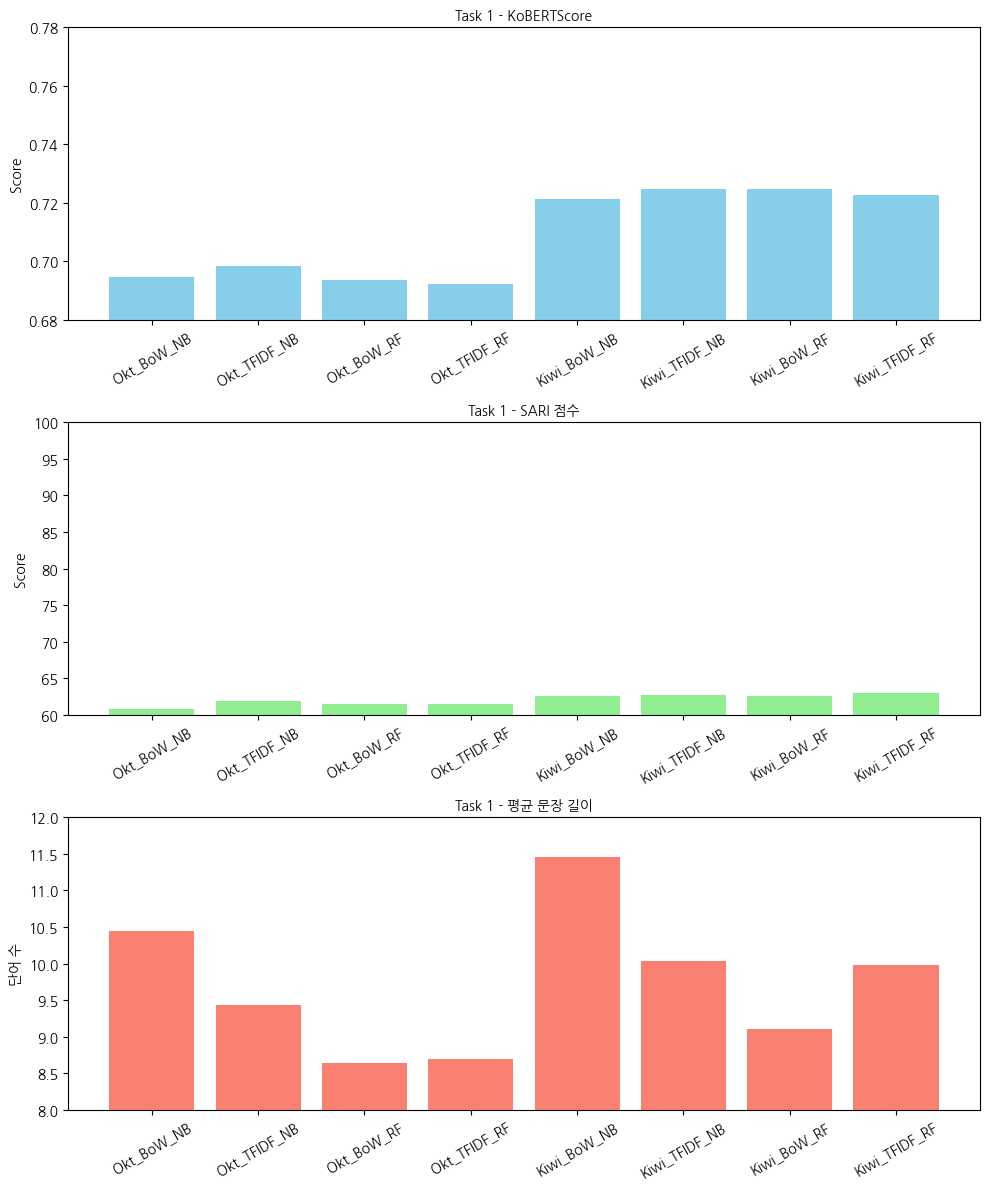

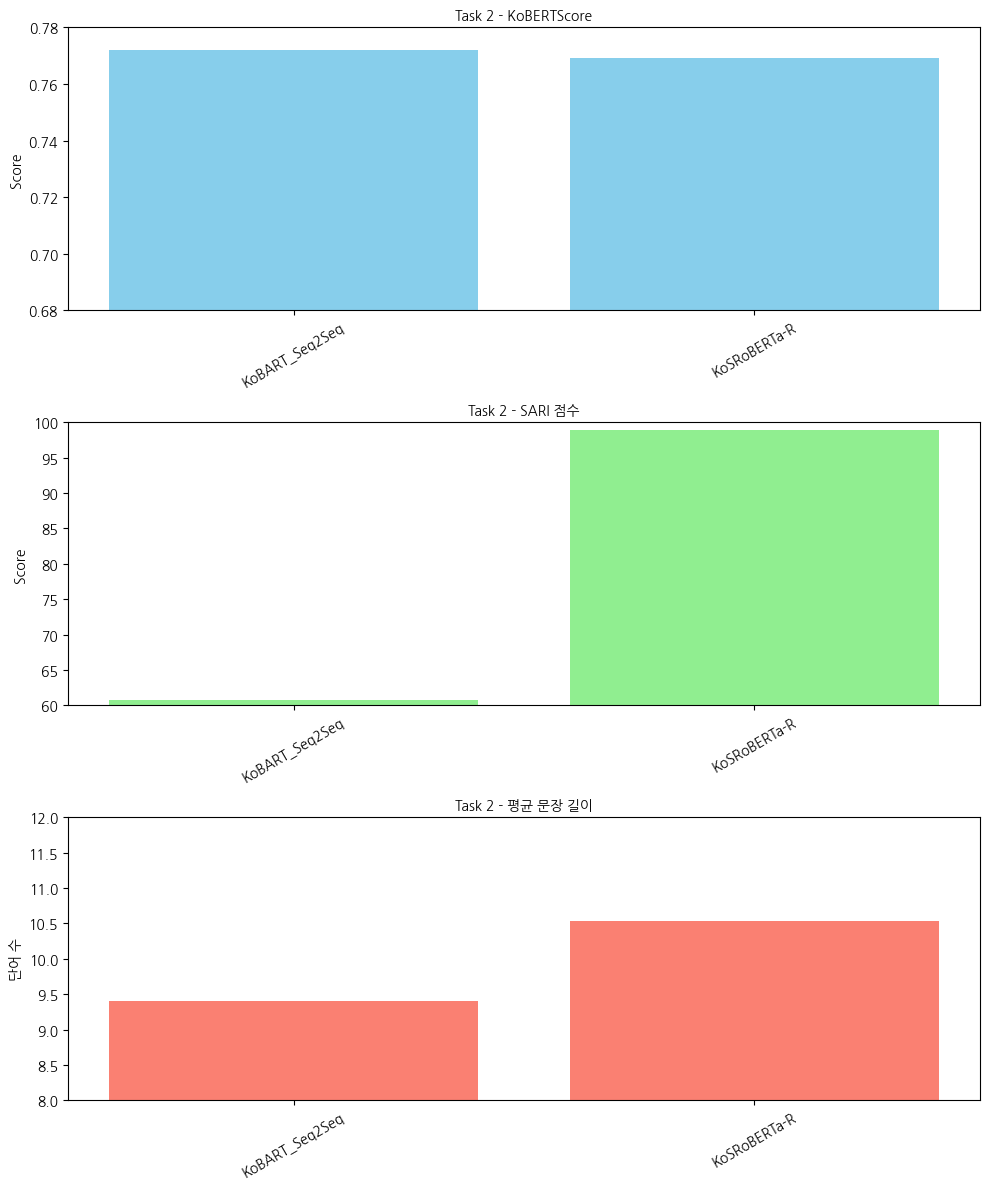

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import pandas as pd

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
mpl.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False

# ================================
# task1.
# Okt + BoW + NaiveBayes:     0.6946 | 60.82 | 10.44
# Okt + TFIDF + NaiveBayes:   0.6985 | 61.88 | 9.44
# Okt + BoW + RandomForest:   0.6935 | 61.52 | 8.64
# Okt + TFIDF + RandomForest: 0.6924 | 61.54 | 8.70
# Kiwi + BoW + NaiveBayes:    0.7214 | 62.60 | 11.46
# Kiwi + TFIDF + NaiveBayes:  0.7246 | 62.67 | 10.04
# Kiwi + BoW + RandomForest:  0.7247 | 62.61 | 9.10
# Kiwi + TFIDF + RandomForest:0.7226 | 62.96 | 9.98

general_data = {
    'Model': [
        'Okt_BoW_NB', 'Okt_TFIDF_NB',
        'Okt_BoW_RF', 'Okt_TFIDF_RF',
        'Kiwi_BoW_NB', 'Kiwi_TFIDF_NB',
        'Kiwi_BoW_RF', 'Kiwi_TFIDF_RF'
    ],
    'KoBERTScore': [0.6946, 0.6985, 0.6935, 0.6924, 0.7214, 0.7246, 0.7247, 0.7226],
    'SARI': [60.82, 61.88, 61.52, 61.54, 62.60, 62.67, 62.61, 62.96],
    'Avg_Length': [10.44, 9.44, 8.64, 8.70, 11.46, 10.04, 9.10, 9.98]
}
df_general = pd.DataFrame(general_data)

# ================================
# task2.
# KoBART Seq2Seq:     0.7721 | 60.73 | 9.40
# KoSRoBERTa Retrieval: 0.7690 | 98.94 | 10.53

highperf_data = {
    'Model': ['KoBART_Seq2Seq', 'KoSRoBERTa-R'],
    'KoBERTScore': [0.7721, 0.7690],
    'SARI': [60.73, 98.94],
    'Avg_Length': [9.40, 10.53]
}
df_highperf = pd.DataFrame(highperf_data)

# ================================
# 공통 그래프 생성 함수
def plot_metrics(df, title_prefix, filename):
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))
    plt.subplots_adjust(hspace=0.5)

    axs[0].bar(df['Model'], df['KoBERTScore'], color='skyblue')
    axs[0].set_title(f'{title_prefix} - KoBERTScore', fontproperties=font_prop)
    axs[0].set_ylabel('Score', fontproperties=font_prop)
    axs[0].set_ylim([0.68, 0.78])
    axs[0].tick_params(axis='x', rotation=30)

    axs[1].bar(df['Model'], df['SARI'], color='lightgreen')
    axs[1].set_title(f'{title_prefix} - SARI 점수', fontproperties=font_prop)
    axs[1].set_ylabel('Score', fontproperties=font_prop)
    axs[1].set_ylim([60, 100])
    axs[1].tick_params(axis='x', rotation=30)

    axs[2].bar(df['Model'], df['Avg_Length'], color='salmon')
    axs[2].set_title(f'{title_prefix} - 평균 문장 길이', fontproperties=font_prop)
    axs[2].set_ylabel('단어 수', fontproperties=font_prop)
    axs[2].set_ylim([8, 12])
    axs[2].tick_params(axis='x', rotation=30)

    # 축 폰트에도 적용
    for ax in axs:
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontproperties(font_prop)

    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

# ================================
# 실행
plot_metrics(df_general, 'Task 1', 'task1.png')
plot_metrics(df_highperf, 'Task 2', 'task2.png')


In [11]:
from google.colab import files
files.download("task1.png")
files.download("task2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>